In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

> Lets Import the heart.csv file into a pandas dataframe


In [3]:
dataset = pd.read_csv('heart.csv')

First of all we need an insight of the data what it contains and how to interpret the data into a more meaningful statistics. So we will first check the contents using head. Head() will give 5 rows as default from the top. We can also use tail, which provides data from the bottom. For now we will stick to head(). 

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



age :            age in years

sex:            (1 = male; 0 = female)

cp:              chest pain type

trestbps       resting blood pressure (in mm Hg on admission to the hospital)

cholserum   cholestoral in mg/dl

fbs(fasting blood sugar > 120 mg/dl): (1 = true; 0 = false)

restecg       resting electrocardiographic results

thalachmaximum heart rate achieved

exangexercise induced angina (1 = yes; 0 = no)

oldpeakST depression induced by exercise relative to rest

slope        the slope of the peak exercise ST segment

ca             number of major vessels (0-3) colored by flourosopy

thal           3 = normal; 6 = fixed defect; 7 = reversable defect

target       1 or 0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's check the shape of the data, i.e count and columns available



In [7]:
dataset.shape

(303, 14)

**Gender distribution in the file using Seaborn**

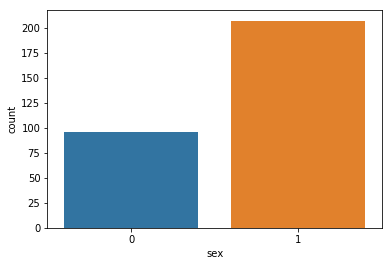

In [7]:
sns.countplot(x='sex',data=dataset)

**Gender Ratio:**

Lets see percentage wise ratio of dataset for gender.

([<matplotlib.patches.Wedge at 0x7f0a41d72860>,
 [Text(-0.14686074568008553, -1.1909793958663977, 'Male'),
  Text(0.13462245242198823, 1.0917311002732724, 'Female')],
 [Text(-0.08566876831338321, -0.6947379809220652, '68.3%'),
  Text(0.07343042859381176, 0.5954896910581484, '31.7%')])

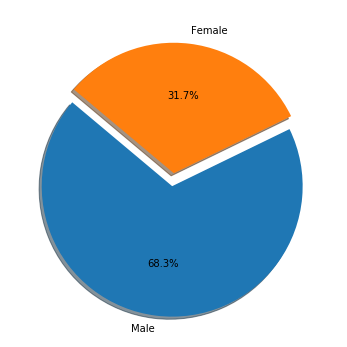

In [8]:
plt.figure(figsize=(8,6))
explode =[0.1,0]
labels='Male','Female'
plt.pie(dataset['sex'].value_counts(),explode=explode,autopct='%1.1f%%',labels=labels,shadow=True,startangle=140)

**Chest Pain** : We can see there are different pain type, so lets build a pie chart which will show the data distribution.


([<matplotlib.patches.Wedge at 0x7f0a41d36c18>,
 [Text(-0.8492609737945328, -0.8477946675873598, 'Pain-Type 0'),
  Text(1.0995795764416507, 0.030409785799970036, 'Pain Type-1'),
  Text(0.13462224799150097, 1.0917311254817803, 'Pain-Type2'),
  Text(-0.6517811933299695, 0.8861045514053978, 'Pain-Type3')],
 [Text(-0.49540223471347744, -0.49454688942595987, '47.2%'),
  Text(0.5997706780590821, 0.016587155890892744, '28.7%'),
  Text(0.07343031708627325, 0.5954897048082438, '16.5%'),
  Text(-0.35551701454361967, 0.4833297553120351, '7.6%')])

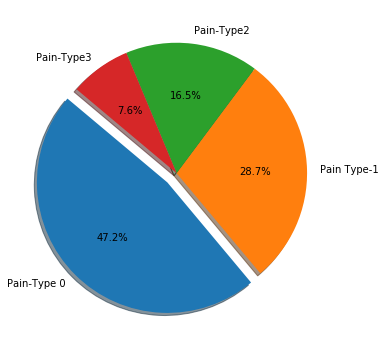

In [9]:
plt.figure(figsize=(10,6))
explode=[0.1,0,0,0]
labels='Pain-Type 0','Pain Type-1','Pain-Type2','Pain-Type3'
plt.pie(dataset['cp'].value_counts(),explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

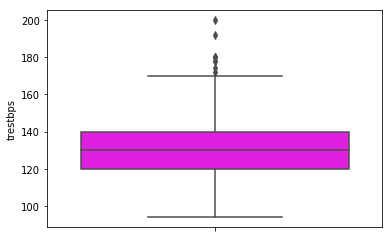

In [10]:
sns.boxplot(dataset['trestbps'],orient='v',color='Magenta')

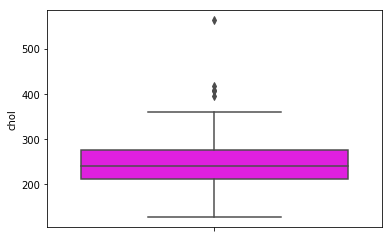

In [11]:
sns.boxplot(dataset['chol'],orient='v',color='Magenta')

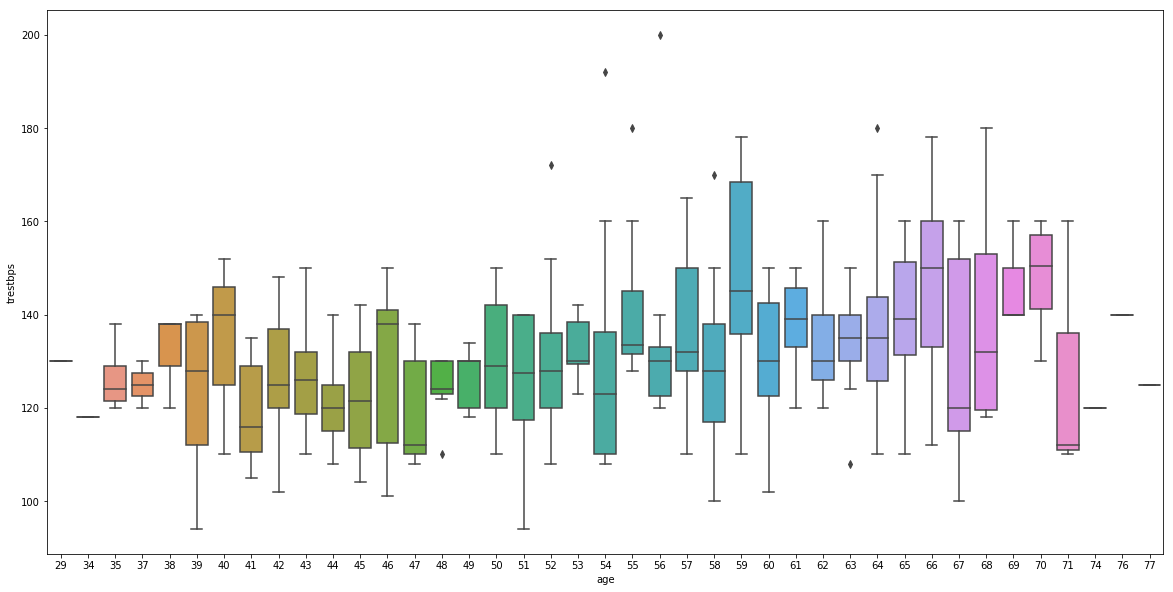

In [12]:

#dataset.plot.scatter(x='age',y='trestbps')
plt.figure(figsize=(20,10))
sns.boxplot(x='age',y='trestbps',data=dataset)

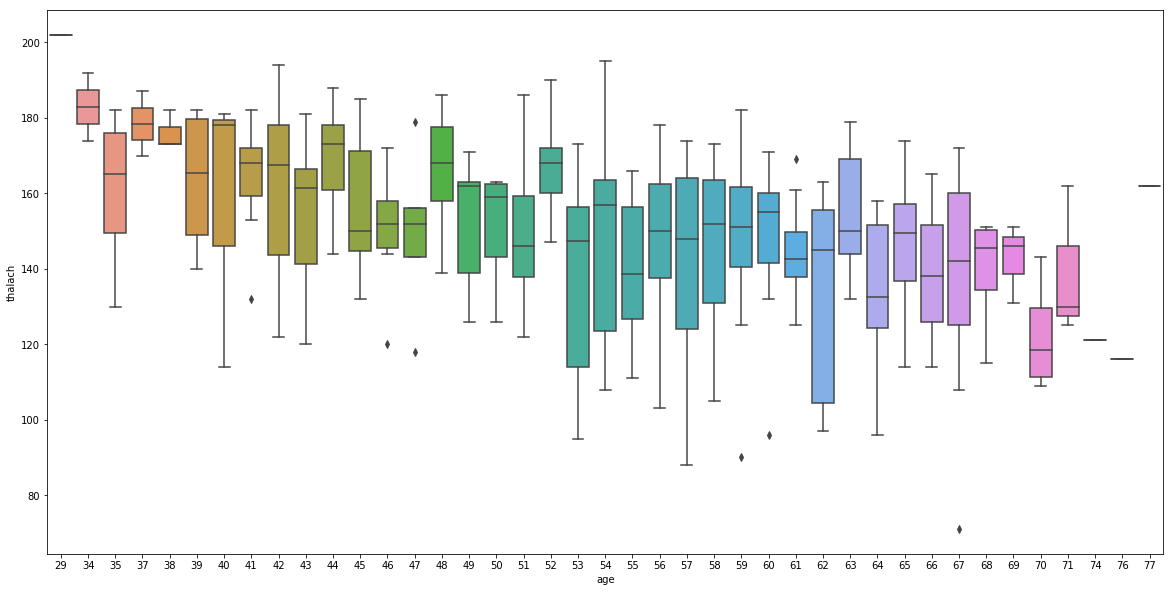

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x='age',y='thalach',data=dataset)

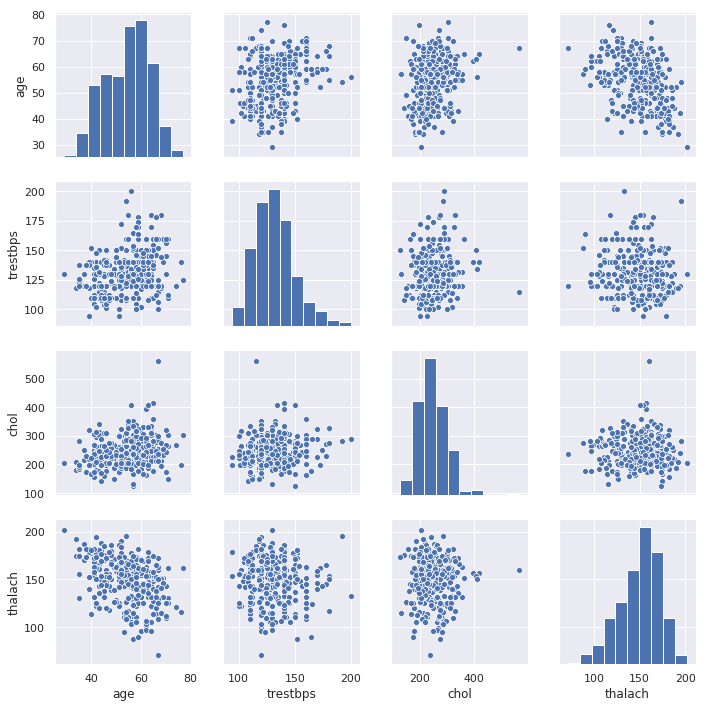

In [14]:
sns.set()
col=['age','trestbps','chol','thalach']
sns.pairplot(dataset[col])
plt.show()

Lets build a heat map to check the co relation between variables. From the below it is evident that hardly strong co realtion exists between variables. 

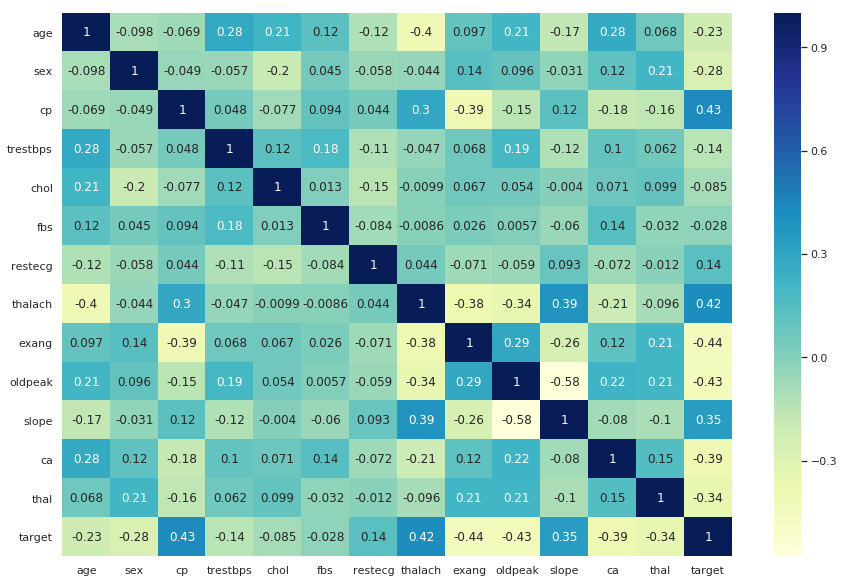

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')

**Creating Dummy Variables:**

From the above we can see there are categorical values, which includes: sex,cp,fbs etc.

So we will create dummy variables. We will also use prefix so that categorical columns when converted are recognized properly.

In [16]:
sex = pd.get_dummies(dataset['sex'],prefix='sex',drop_first=True)
fbs = pd.get_dummies(dataset['fbs'],prefix='fbs',drop_first=True)
restecg = pd.get_dummies(dataset['restecg'],prefix='restecg',drop_first=True)
exang = pd.get_dummies(dataset['exang'],prefix='exang',drop_first=True)
cp = pd.get_dummies(dataset['cp'],prefix='cp',drop_first=True)
slope = pd.get_dummies(dataset['slope'],prefix='slope',drop_first=True)
thal = pd.get_dummies(dataset['thal'],prefix='thal',drop_first=True)

dataset = pd.concat([dataset,sex,fbs,restecg,exang,cp,slope,thal],axis=1)



#Will do a quick check if it worked or not :P
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,restecg_2,exang_1,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,1,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,1,0,1,0


Dropping the columns since we have already converted the categorical data and taken care the dummy trap above

In [17]:
dataset = dataset.drop(columns=['sex','fbs','restecg','exang','cp','slope','thal'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,fbs_1,restecg_1,restecg_2,exang_1,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


**Making Predictions**



Extracting the dependent (Y) and X variables.



In [18]:
X= dataset.drop('target',axis=1)
y = dataset['target'].values

**Train Test Splitting**

We will split the data into train test based on 80:20 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Standard Scaler**

Lets Standarize the data before fitting the data into the model.Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.



In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

**PCA component **



In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None,random_state=0)
X_train = pca.fit_transform(X_train)
X_test =pca.transform(X_test)

pca.explained_variance_ratio_


array([0.20480141, 0.09949383, 0.07489762, 0.07173227, 0.06547348,
       0.06030261, 0.05691115, 0.05155815, 0.04724307, 0.04431957,
       0.04204504, 0.03951083, 0.03718612, 0.03026704, 0.02868379,
       0.02261295, 0.01716076, 0.00503239, 0.00076793])

**Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)



**Support Vector **

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel ='rbf',random_state=0)
sv.fit(X_train,y_train)
sv_pred = sv.predict(X_test)
sv_score = sv.score(X_test,y_test)

**Random Forest Classifier**

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_regressor = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)
rf_score = rf_regressor.score(X_test,y_test)


NameError: name 'X_train' is not defined

**KNN**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_score = knn.score(X_test,y_test)


**Naive Bayes**

In [26]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(X_train,y_train)
nv_sc = nv.score(X_test,y_test)

**Model Score**

In [27]:

print("Logistic Regression Model Score is ",round(lr_score*100))
print("SVC Model Score is ",round(sv_score*100))
#print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_score*100))

print("KNeighbors Classifiers Model score is",round(knn_score*100))
print("Naive Bayes model score is",round(nv_sc*100))


Logistic Regression Model Score is  85.0
SVC Model Score is  87.0
Random Forest Regression Model Score is  84.0
KNeighbors Classifiers Model score is 77.0
Naive Bayes model score is 80.0


**Cross Validation Score with 10 iteration**

In [28]:


from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = lr,X = X_train,y = y_train,cv = 10)
accuracies_sv = cross_val_score(estimator = sv,X = X_train,y = y_train,cv = 10)
accuracies_rf = cross_val_score(estimator = rf_regressor,X = X_train,y = y_train,cv = 10)

accuracies_knn = cross_val_score(estimator = knn,X = X_train,y = y_train,cv = 10)
accuracies_nv = cross_val_score(estimator = nv,X = X_train,y = y_train,cv = 10)

print("Mean Accuracies based on cross val score for logistic regression",round(accuracies_lr.mean()*100))
print("Mean Accuracies based on cross val score for SVM ",round(accuracies_sv.mean()*100))
print("Mean Accuracies based on cross val score for Random Forest",round(accuracies_rf.mean()*100))

print("Mean Accuracies based on cross val score for KNN",round(accuracies_knn.mean()*100))
print("Mean Accuracies based on cross val score for Naive Bayes",round(accuracies_nv.mean()*100))


Mean Accuracies based on cross val score for logistic regression 82.0
Mean Accuracies based on cross val score for SVM  79.0
Mean Accuracies based on cross val score for Random Forest 80.0
Mean Accuracies based on cross val score for KNN 74.0
Mean Accuracies based on cross val score for Naive Bayes 78.0


**Confusion Matrix:**

Logistic Regression and Random Forest since this performs a better model in comparison to other



In [29]:

cm_lr = confusion_matrix(y_test,y_pred)
cm_lr


array([[21,  6],
       [ 3, 31]])

**Confusion Matrix** for Random Forest is as below


In [30]:
cm_rf = confusion_matrix(y_test,rf_pred)
cm_rf

array([[21,  6],
       [ 4, 30]])

**Conclusion**

Though there are weak co relation between variables and also exists other model, but Logistic Model and Random Forest much better than other model. 


Please ****Upvote**** my work if you like it :)

